In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import bs4
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
import time

In [9]:
url = 'https://www.imdb.com/list/ls058011111/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

movie_data = soup.findAll('div', attrs = {'class' : 'lister-item mode-detail'})

In [10]:
name = []
for store in movie_data:
  name.append(store.h3.a.text.strip())

In [12]:
# base_dir = 'F:/Repositorios de codigo/Github/ds_face_recognition/images/'
for index in range(len(name)-80):
  base_dir = './images/'
  directory = f'{name[index]}'
  path = os.path.join(base_dir, directory)
  os.makedirs(path)
  print("Directory '% s' created" % directory)

Directory 'Robert De Niro' created
Directory 'Jack Nicholson' created
Directory 'Marlon Brando' created
Directory 'Denzel Washington' created
Directory 'Katharine Hepburn' created
Directory 'Humphrey Bogart' created
Directory 'Meryl Streep' created
Directory 'Daniel Day-Lewis' created
Directory 'Sidney Poitier' created
Directory 'Clark Gable' created
Directory 'Ingrid Bergman' created
Directory 'Tom Hanks' created
Directory 'Elizabeth Taylor' created
Directory 'Bette Davis' created
Directory 'Gregory Peck' created
Directory 'Leonardo DiCaprio' created
Directory 'Cate Blanchett' created
Directory 'Audrey Hepburn' created
Directory 'Spencer Tracy' created
Directory 'Kate Winslet' created


In [13]:
#creating a directory to save images
def download_image(url, folder_name, num):

    # write image to file
    reponse = requests.get(url)
    if reponse.status_code==200:
        with open(os.path.join(folder_name, str(num)+".jpg"), 'wb') as file:
            file.write(reponse.content)

chromePath=r'F:/Downloads/chromedriver_win32/chromedriver.exe'
driver=webdriver.Chrome(chromePath)

for index in range(len(name) - 80):
    folder_name = f'./images/{name[index]}'
    if not os.path.isdir(folder_name):
        os.makedirs(folder_name)
    
    search_name = f'Actor {name[index]}'.replace(" ", "+")
    search_URL = f"https://www.google.com/search?q={search_name}&source=lnms&tbm=isch"
    driver.get(search_URL)

    #Scrolling all the way up
    driver.execute_script("window.scrollTo(0, 0);")

    page_html = driver.page_source
    pageSoup = bs4.BeautifulSoup(page_html, 'html.parser')
    containers = pageSoup.findAll('div', {'class':"isv-r PNCib MSM1fd BUooTd"} )

    # print(len(containers))

    len_containers = len(containers)

    for i in range(17):
        if i % 25 == 0:
            continue

        xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(i)

        previewImageXPath = """//*[@id="islrg"]/div[1]/div[%s]/a[1]/div[1]/img"""%(i)
        previewImageElement = driver.find_element_by_xpath(previewImageXPath)
        previewImageURL = previewImageElement.get_attribute("src")
        #print("preview URL", previewImageURL)

        driver.find_element_by_xpath(xPath).click()

        #It's all about the wait

        timeStarted = time.time()
        while True:

            imageElement = driver.find_element_by_xpath("""//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div[1]/a/img""")
            imageURL= imageElement.get_attribute('src')

            if imageURL != previewImageURL:
                #print("actual URL", imageURL)
                break

            else:
                #making a timeout if the full res image can't be loaded
                currentTime = time.time()

                if currentTime - timeStarted > 10:
                    print("Timeout! Will download a lower resolution image and move onto the next one")
                    break


        #Downloading image
        try:
            download_image(imageURL, folder_name, i)
            print("Downloaded element %s out of %s total. URL: %s" % (i, 10, imageURL))
        except:
            print("Couldn't download an image %s, continuing downloading the next one"%(i))


C:\Users\igorS\AppData\Local\Temp/ipykernel_28556/719885144.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(chromePath)
C:\Users\igorS\AppData\Local\Temp/ipykernel_28556/719885144.py:40: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  previewImageElement = driver.find_element_by_xpath(previewImageXPath)
C:\Users\igorS\AppData\Local\Temp/ipykernel_28556/719885144.py:44: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath(xPath).click()
C:\Users\igorS\AppData\Local\Temp/ipykernel_28556/719885144.py:51: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  imageElement = driver.find_element_by_xpath("""//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div[1]/a/img""")


Downloaded element 1 out of 10 total. URL: https://upload.wikimedia.org/wikipedia/commons/5/58/Robert_De_Niro_Cannes_2016.jpg
Downloaded element 2 out of 10 total. URL: https://upload.wikimedia.org/wikipedia/commons/b/bd/1990_Venice_Film_Festival_Robert_De_Niro.jpg
Downloaded element 3 out of 10 total. URL: https://br.web.img3.acsta.net/c_310_420/pictures/15/09/16/17/30/201281.jpg
Downloaded element 4 out of 10 total. URL: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/RobertdeNiro26.JPG/180px-RobertdeNiro26.JPG
Downloaded element 5 out of 10 total. URL: https://cdn.britannica.com/00/213300-050-ADF31CD9/American-actor-Robert-De-Niro-2019.jpg?w=400&h=300&c=crop
Downloaded element 6 out of 10 total. URL: https://m.media-amazon.com/images/M/MV5BMjAwNDU3MzcyOV5BMl5BanBnXkFtZTcwMjc0MTIxMw@@._V1_.jpg
Downloaded element 7 out of 10 total. URL: https://i.pinimg.com/564x/87/c5/e0/87c5e0ad856ab0ee1c1c6c54da105f21.jpg
Downloaded element 8 out of 10 total. URL: https://assets.palmspring

In [8]:
import cv2

In [15]:
import sys
import cv2

def face_detect(imgpath, nogui = False, cascasdepath = "haarcascade_frontalface_default.xml"):

    image = cv2.imread(imgpath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    face_cascade = cv2.CascadeClassifier(cascasdepath)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 3,
        minSize = (30,30)
        # flags=cv2.CASCADE_SCALE_IMAGE
        )

    print("The number of faces found = ", len(faces))

    # for (x,y,w,h) in faces:
    #     cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    for box in faces:
        # extract
        x, y, width, height = box
        x2, y2 = x + width, y + height
        # draw a rectangle over the pixels
        cv2.rectangle(image, (x, y), (x2, y2), (0,0,255), 1)
    
    # return len(faces)
    if nogui:
        cv2.imwrite('test_face.png', image)
        return len(faces)
    else:
        cv2.imshow("Faces found", image)
        cv2.waitKey(0)

if __name__ == "__main__":
    faces = face_detect('F:/Repositorios de codigo/Github/ds_face_recognition/images/Kate Winslet/1.jpg')
    print(faces)

The number of faces found =  2
None


In [13]:

print(mtcnn.__version__)

0.1.0


In [3]:
# face detection with mtcnn on a photograph
import mtcnn
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'F:/Repositorios de codigo/Github/ds_face_recognition/images/Daniel Day-Lewis/6.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

{'box': [660, 105, 161, 200], 'confidence': 0.999186098575592, 'keypoints': {'left_eye': (699, 179), 'right_eye': (771, 168), 'nose': (741, 231), 'mouth_left': (718, 262), 'mouth_right': (775, 254)}}
{'box': [54, 160, 211, 253], 'confidence': 0.9984248876571655, 'keypoints': {'left_eye': (88, 280), 'right_eye': (175, 249), 'nose': (134, 339), 'mouth_left': (138, 380), 'mouth_right': (207, 354)}}
{'box': [322, 91, 247, 337], 'confidence': 0.9939801692962646, 'keypoints': {'left_eye': (423, 218), 'right_eye': (526, 240), 'nose': (472, 315), 'mouth_left': (393, 347), 'mouth_right': (478, 364)}}


In [16]:
# get coordinates
x, y, width, height = result['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')

NameError: name 'result' is not defined

1


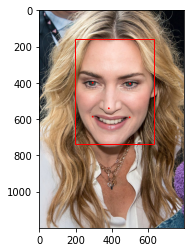

In [17]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'F:/Repositorios de codigo/Github/ds_face_recognition/images/Kate Winslet/1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
print(len(faces))
# display faces on the original image
draw_image_with_boxes(filename, faces)